In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
dataset=pd.read_csv("/content/Wine.csv")

In [5]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X_train)
y=sc.transform(X_test)

In [9]:
X

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [10]:
y

array([[ 9.38847070e-01, -6.32166068e-01, -4.35010303e-01,
        -9.19695615e-01,  1.26324041e+00,  5.59998633e-01,
         9.77754158e-01, -1.20637533e+00,  2.36680192e-02,
         3.39284695e-01, -1.45574805e-01,  8.52295413e-01,
         1.04940526e+00],
       [-2.42263344e-01,  2.67579163e-01,  4.20859365e-01,
         7.12764102e-01,  8.40672358e-01, -1.27747161e+00,
        -6.05828120e-01, -9.70634096e-01, -5.87397203e-01,
         2.42611713e+00, -2.06608025e+00, -1.55017035e+00,
        -8.66598582e-01],
       [-7.64438475e-01, -1.11802849e+00, -7.69915825e-01,
        -1.61767889e-01, -9.20027861e-01,  2.03653722e+00,
         1.18341419e+00, -1.36353615e+00,  4.48018868e-01,
        -2.50930538e-01,  1.16386073e+00,  3.94021597e-01,
        -1.06480588e+00],
       [ 7.15057728e-01, -5.78181354e-01,  3.46435916e-01,
         2.75498106e-01,  1.12238439e+00,  1.15061407e+00,
         8.54358136e-01, -1.28495574e+00,  1.43251284e+00,
         5.07917619e-01,  1.16312302e

In [13]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0 14  0]
 [ 0 16  0]
 [ 0  6  0]]


0.4444444444444444

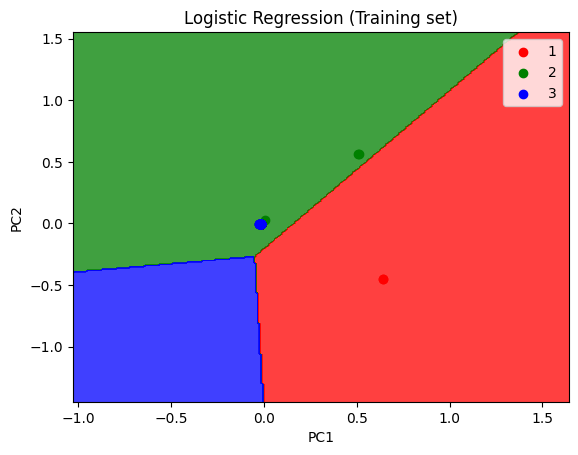

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()